
Loan Application Status Prediction

Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:

1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions

3.	Married - This refers to applicant being in a state of matrimony

4.	Dependents - This refres to persons who depends on the applicants for survival

5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university

6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer

7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.

8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.

9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.

10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant

11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.

12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.

13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

Dataset Link-  https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv




In [1]:
#import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()


# Importing dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


We observe that in this data set numerical as well as categorical data is present

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Exploratory data analysis

In [4]:
#checking the null value of  column of dataset
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We observe that there is  missing value 

In [5]:
print("Number of null or missing values in dataset",df.isnull().sum().sum())

Number of null or missing values in dataset 149


<Axes: >

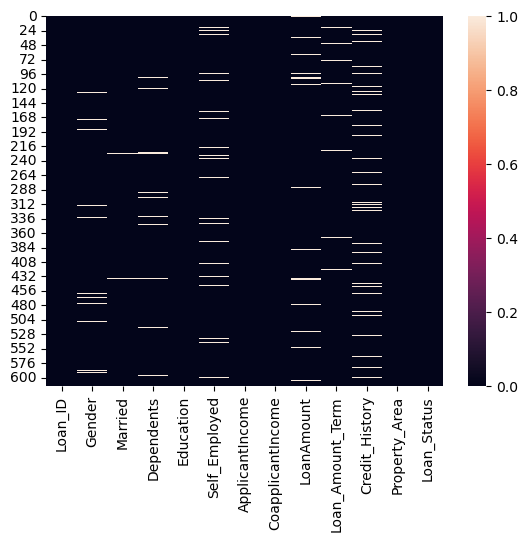

In [6]:
#checking the null value of  column of dataset by heat map
sns.heatmap(df.isnull())

we observe that there is  null value present

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


we observe that there is  null value in each feature

In [8]:
#checking the shape of dataset
df.shape

(614, 13)

we observe that there is 614 row and 13 column are present

In [9]:
#checking the column of dataset
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
# to convert index from row to column
df.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [11]:
#checking the types of column of dataset
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

we observe that there is two datatype are present float and object

In [12]:
#checking the unique values of column of dataset
df.nunique().to_frame("No. of unique values")

,No. of unique values
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


We observe that our target Loan_Status have two unique value 

In [13]:
#checking the null value of all column of dataset
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64


Male      489
Female    112
Name: Gender, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253

In [14]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

We observe that loan sanction to 422 and not sanction to 192 customer

In [15]:
#checking the categorical& numerical value of all column of dataset
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical columns:",categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical columns:",numerical_col)

Categorical columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


Numerical columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


There are 5 Numerical column are present and 8 Categorical columns also present

# Description of data set

In [16]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


This gives the all statical information of the numerical columns.There is no negative or 
invalid value is present hence we can say that it is perfect

we can obserbe these points:
    
1.The counts of all columns are not  same it means there is  missing value in many column

2.The mean value is more than median(50%) in approx all features it means there is right hand skewness

3.There is Loan_Amount_Term and	Credit_History  columns in which mean value is less than median(50%) hence there left hand skewed

4.There is major difference beteen 75% and max in all features it means the outliers are present in these columns

5.In this discription min,std and 25% ditail also found

# Encoding columns value

In [17]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Loan_ID']=le.fit_transform(df['Loan_ID'])
df['Loan_ID']

0        0
1        1
2        2
3        3
4        4
      ... 
609    609
610    610
611    611
612    612
613    613
Name: Loan_ID, Length: 614, dtype: int32

In [18]:

df['Gender']=le.fit_transform(df['Gender'])
df['Gender']

0      1
1      1
2      1
3      1
4      1
      ..
609    0
610    1
611    1
612    1
613    0
Name: Gender, Length: 614, dtype: int32

In [19]:

df['Married']=le.fit_transform(df['Married'])
df['Married']

0      0
1      1
2      1
3      1
4      0
      ..
609    0
610    1
611    1
612    1
613    0
Name: Married, Length: 614, dtype: int32

In [20]:

df['Dependents']=le.fit_transform(df['Dependents'])
df['Dependents']

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: int32

In [21]:

df['Education']=le.fit_transform(df['Education'])
df['Education']

0      0
1      0
2      0
3      1
4      0
      ..
609    0
610    0
611    0
612    0
613    0
Name: Education, Length: 614, dtype: int32

In [22]:

df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Self_Employed']

0      0
1      0
2      1
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    1
Name: Self_Employed, Length: 614, dtype: int32

In [23]:

df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Property_Area']

0      2
1      0
2      2
3      2
4      2
      ..
609    0
610    0
611    2
612    2
613    1
Name: Property_Area, Length: 614, dtype: int32

In [24]:

df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [25]:
# Fill NaN values in  column with 'mean' and 'mode'
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [26]:
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)

In [27]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)

In [28]:
df['Gender'].fillna(df['Gender'].mode(), inplace=True)

In [29]:
df['Married'].fillna(df['Married'].mode(), inplace=True)

In [30]:
df['Dependents'].fillna(df['Dependents'].mode(), inplace=True)

In [31]:
df['Self_Employed'].fillna(df['Self_Employed'].mean(), inplace=True)

In [32]:
#checking the null value of  column of dataset
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:
print("Number of null or missing values in dataset",df.isnull().sum().sum())

Number of null or missing values in dataset 0


<Axes: >

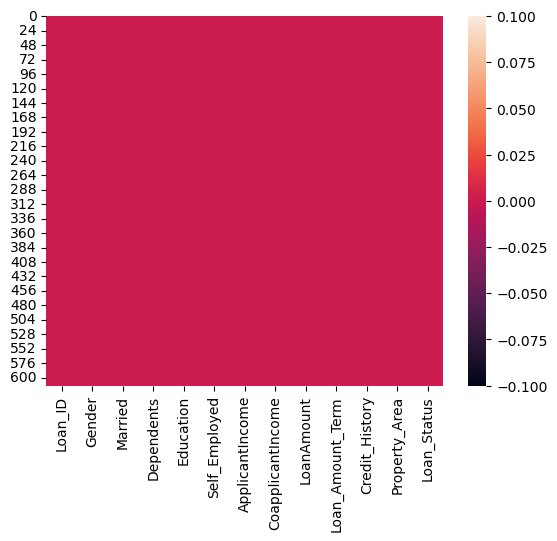

In [34]:
#checking the null value of  column of dataset by heat map
sns.heatmap(df.isnull())

we observe that all nan or missing values present

# Data visualization

1    422
0    192
Name: Loan_Status, dtype: int64


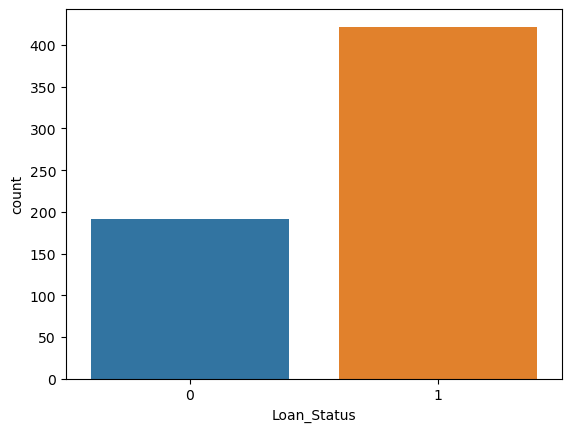

In [35]:
#visualizing the no of Loan_Status
ax=sns.countplot(x='Loan_Status',data=df)
print(df['Loan_Status'].value_counts())

We observe that 192 customer loan not sanctioned and 422 customer loan sanctioned it means most of customer loan sanctioned 

[Text(0.5, 1.0, 'Married effect on Loan_Status')]

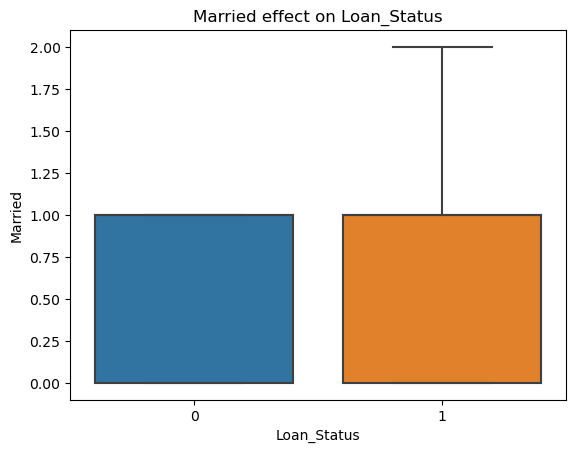

In [36]:
bp = sns.boxplot(x='Loan_Status',y='Married', data=df)
bp.set(title="Married effect on Loan_Status")

we observe that married or unmarried status does not affect on loan status

[Text(0.5, 1.0, 'Gender effect on Loan_Status')]

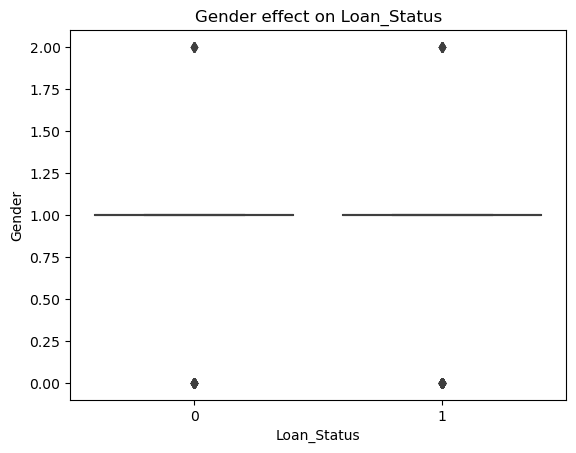

In [37]:
bp = sns.boxplot(x='Loan_Status',y='Gender', data=df)
bp.set(title="Gender effect on Loan_Status")

we observe that gender status does not affect on loan status

[Text(0.5, 1.0, 'Education effect on Loan_Status')]

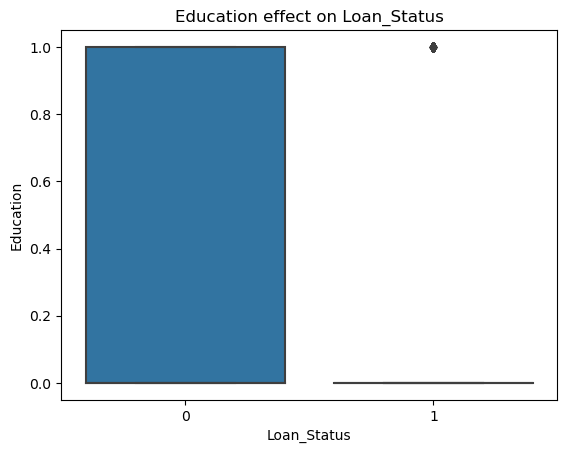

In [38]:
bp = sns.boxplot(x='Loan_Status',y='Education', data=df)
bp.set(title="Education effect on Loan_Status")

we observe that effect of education not seen 

[Text(0.5, 1.0, 'Self_Employed effect on attrition')]

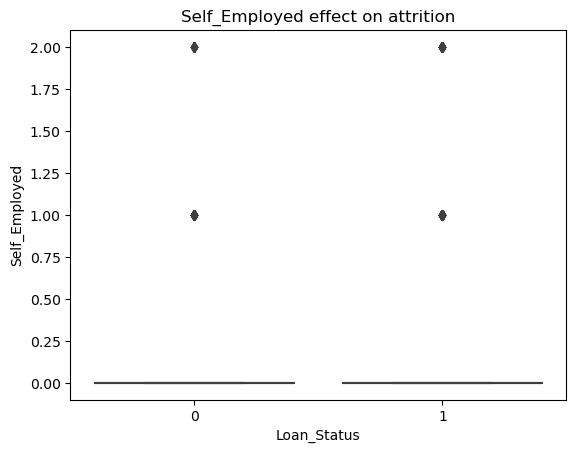

In [39]:
bp = sns.boxplot(x='Loan_Status',y='Self_Employed', data=df)
bp.set(title="Self_Employed effect on attrition")

we observe that effect of Self_Employed approx same 

[Text(0.5, 1.0, 'Property_Area effect on attrition')]

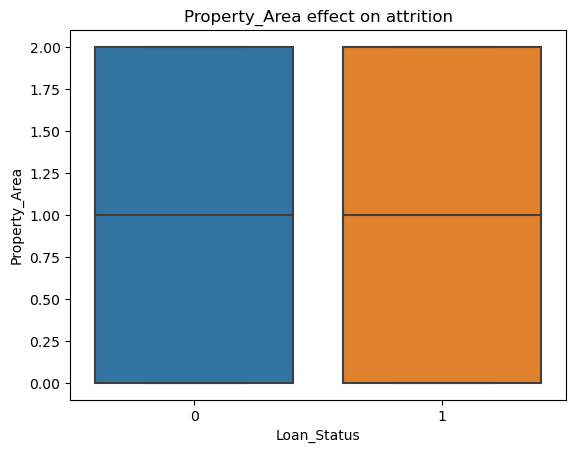

In [40]:
bp = sns.boxplot(x='Loan_Status',y='Property_Area', data=df)
bp.set(title="Property_Area effect on attrition")

we observe there no effect of Property_Area

[Text(0.5, 1.0, 'ApplicantIncome effect on attrition')]

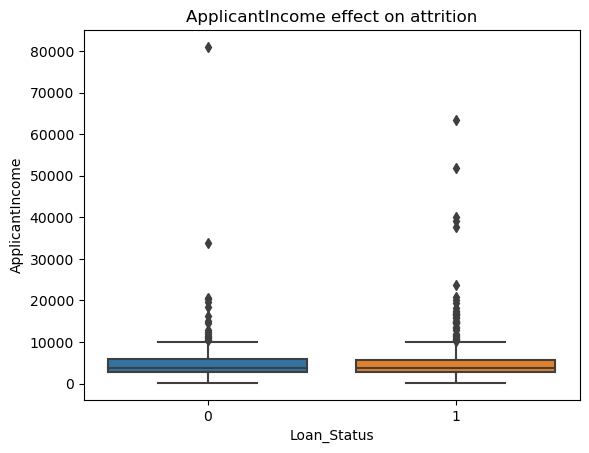

In [41]:
bp = sns.boxplot(x='Loan_Status',y='ApplicantIncome', data=df)
bp.set(title="ApplicantIncome effect on attrition")

we observe that when Applicant Income will increase the loan sanction percentage will increase

[Text(0.5, 1.0, 'CoapplicantIncome effect on attrition')]

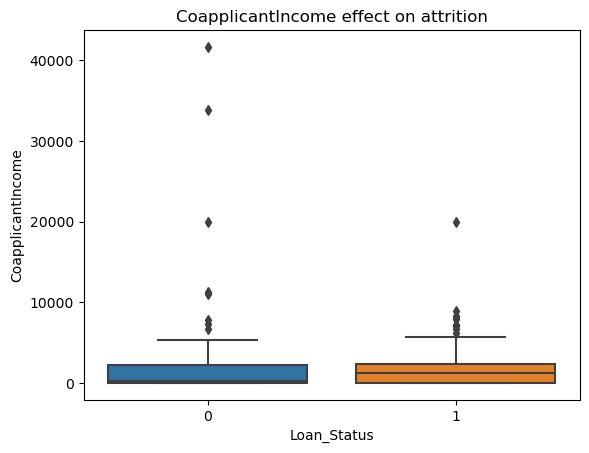

In [42]:
bp = sns.boxplot(x='Loan_Status',y='CoapplicantIncome', data=df)
bp.set(title="CoapplicantIncome effect on attrition")

we observe that CoapplicantIncome income also increase the percentage of sanction 

[Text(0.5, 1.0, 'LoanAmount effect on attrition')]

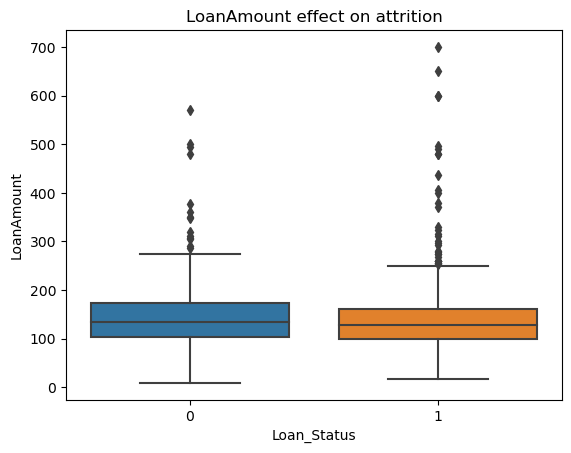

In [43]:
bp = sns.boxplot(x='Loan_Status',y='LoanAmount', data=df)
bp.set(title="LoanAmount effect on attrition")

we observe that if loan amount is highet then sanction percentage is higher

[Text(0.5, 1.0, 'Loan_Amount_Term effect on attrition')]

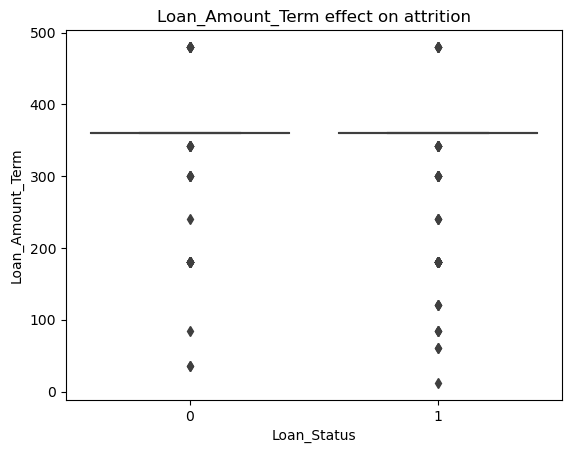

In [44]:
bp = sns.boxplot(x='Loan_Status',y='Loan_Amount_Term', data=df)
bp.set(title="Loan_Amount_Term effect on attrition")

we observe there no effect of loan amount

[Text(0.5, 1.0, 'Credit_History effect on attrition')]

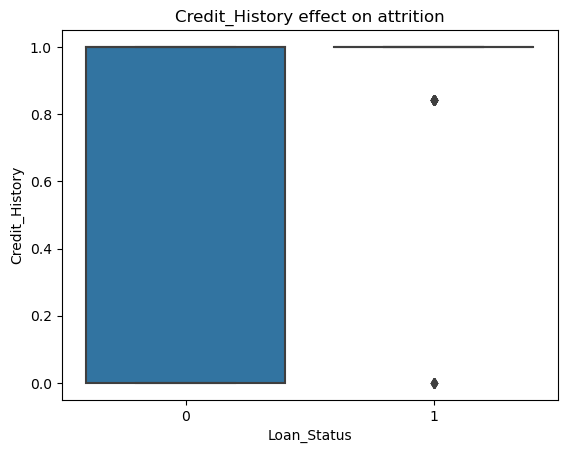

In [45]:
bp = sns.boxplot(x='Loan_Status',y='Credit_History', data=df)
bp.set(title="Credit_History effect on attrition")

we observe that when Credit_History is good then loan sanctioned

# Cleaning of dataset

In [46]:
df.drop(['Loan_ID'], axis=1, inplace=True)

In [47]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


after droping unrelavent column we have 614 row and 13 column are present

In [48]:
df.groupby('Loan_Status').mean()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_Status,,,,,,,,,,,
0,0.833333,0.588542,0.854167,0.270833,0.229167,5446.078125,1877.807292,150.945488,344.000000,0.562232,1.000000
1,0.841232,0.689573,0.836493,0.194313,0.241706,5384.068720,1504.516398,144.349606,341.090047,0.969577,1.054502


we observe that male customer gate more loan 

In [49]:
df.groupby('Education').mean()

,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Education,,,,,,,,,,,
0,0.833333,0.656250,0.806250,0.243750,5857.433333,1717.474833,153.821213,344.625000,0.856586,1.064583,0.708333
1,0.858209,0.664179,0.970149,0.216418,3777.283582,1276.544776,119.872277,332.597015,0.790661,0.940299,0.611940


# Correlation Matrix and Heatmap

In [50]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.336094,0.149674,0.024382,-0.025022,0.094472,0.073308,0.136081,-0.067778,-0.000490,-0.030903,0.008690
Married,0.336094,1.000000,0.338689,0.006759,-0.038153,0.052119,0.069877,0.145541,-0.096253,0.010302,0.007973,0.096657
Dependents,0.149674,0.338689,1.000000,0.060466,0.005622,0.103416,0.011146,0.130722,-0.073683,-0.077539,0.032600,-0.007318
Education,0.024382,0.006759,0.060466,1.000000,-0.021130,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.025022,-0.038153,0.005622,-0.021130,1.000000,0.095664,0.052218,0.089806,-0.036965,0.052701,-0.013439,0.010880
ApplicantIncome,0.094472,0.052119,0.103416,-0.140760,0.095664,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.073308,0.069877,0.011146,-0.062290,0.052218,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.136081,0.145541,0.130722,-0.166998,0.089806,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.067778,-0.096253,-0.073683,-0.077242,-0.036965,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,-0.000490,0.010302,-0.077539,-0.077936,0.052701,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


Text(0.5, 1.0, 'Correlations Among Features')

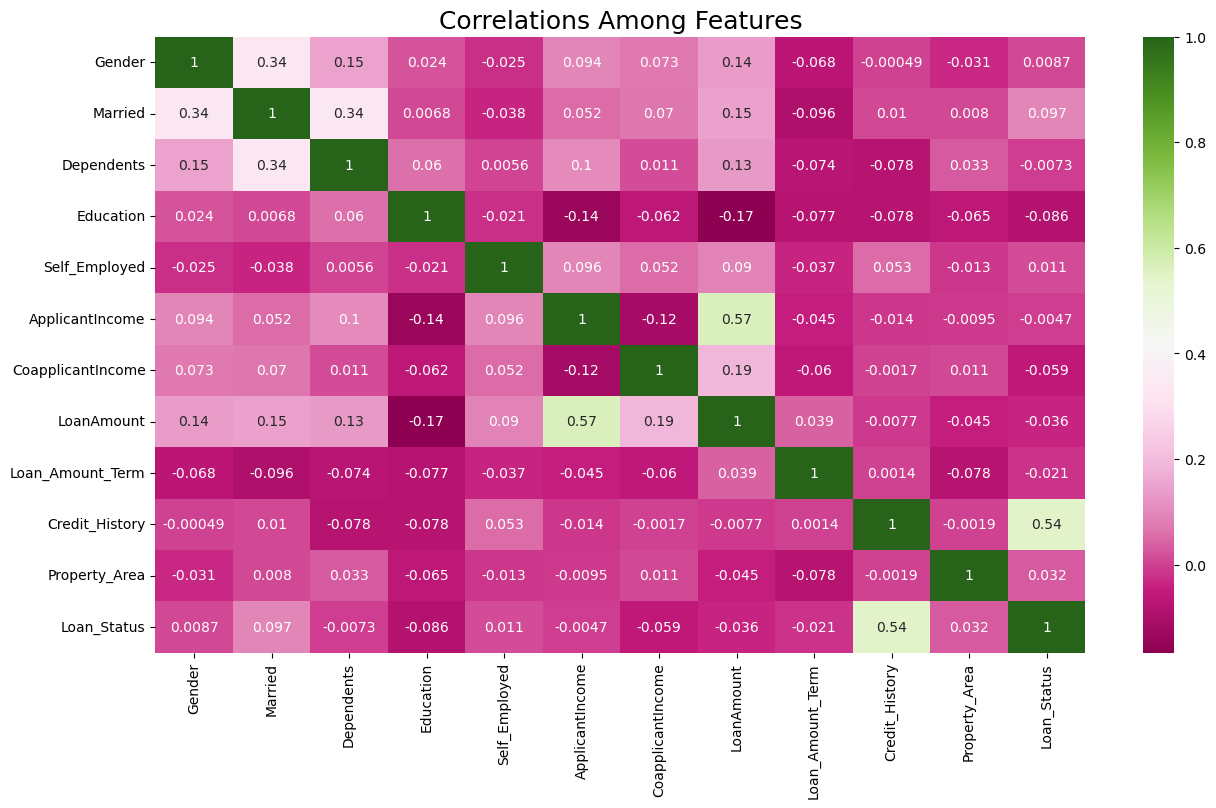

In [51]:
plt.subplots(figsize = (15,8))
sns.heatmap(df.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 18)

Positive Correlation Features:

Loan status and credit history are positively related is 0.54.

Negative Correlation Features:

Loan status and education and coapplicantincome are negativelly related is -0.086 and 0.059


In [52]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [53]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [54]:
correlations = df.corr()['Loan_Status'].sort_values(ascending=False)
print(correlations)

Loan_Status          1.000000
Credit_History       0.540483
Married              0.096657
Property_Area        0.032112
Self_Employed        0.010880
Gender               0.008690
ApplicantIncome     -0.004710
Dependents          -0.007318
Loan_Amount_Term    -0.020974
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64


no data is skewed

<Axes: >

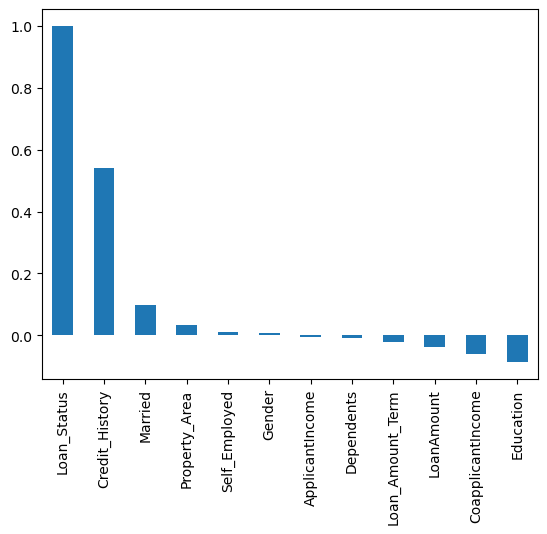

In [55]:
correlations.plot(kind='bar')

we observe that credit history is positively and education is highly negatively correleted

# checking skewness

In [56]:
#checking skewness
df.skew()

Gender              -0.953015
Married             -0.538097
Dependents           1.089068
Education            1.367622
Self_Employed        2.191118
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

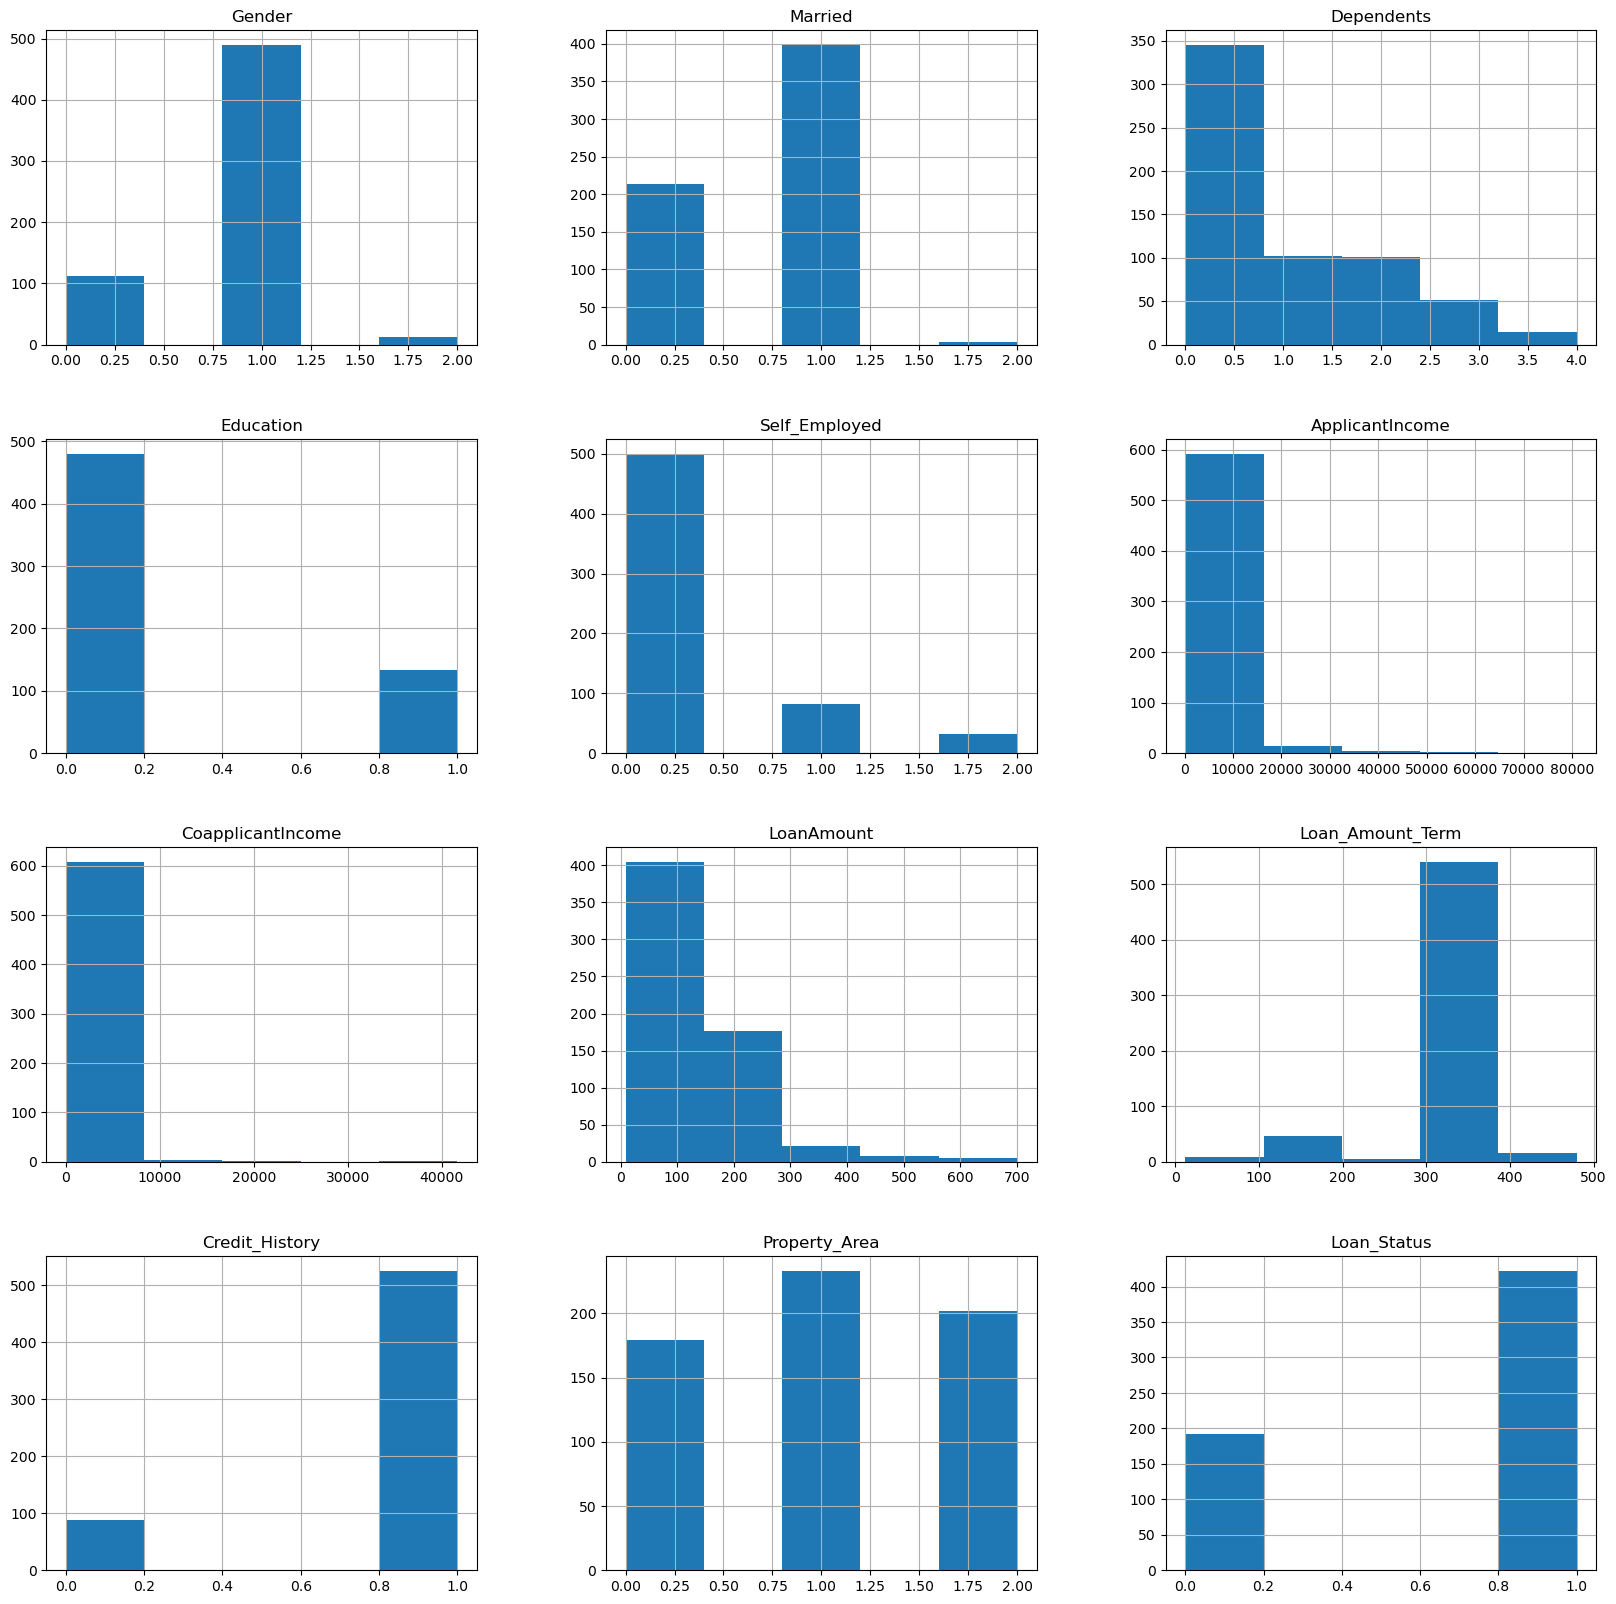

In [57]:
df.hist(bins=5, figsize=(20, 20))
plt.show()

# Reduce skewness

In [58]:
df['Dependents'] = np.cbrt(df['Dependents'])

In [59]:
df['Self_Employed'] = np.cbrt(df['Self_Employed'])

In [60]:
df['ApplicantIncome'] = np.cbrt(df['ApplicantIncome'])

In [61]:
df['CoapplicantIncome'] = np.cbrt(df['CoapplicantIncome'])

In [62]:
df['LoanAmount'] = np.cbrt(df['LoanAmount'])

In [63]:
df['Loan_Amount_Term'] = np.cbrt(df['Loan_Amount_Term'])

In [64]:
df['Credit_History'] = np.cbrt(df['Credit_History'])

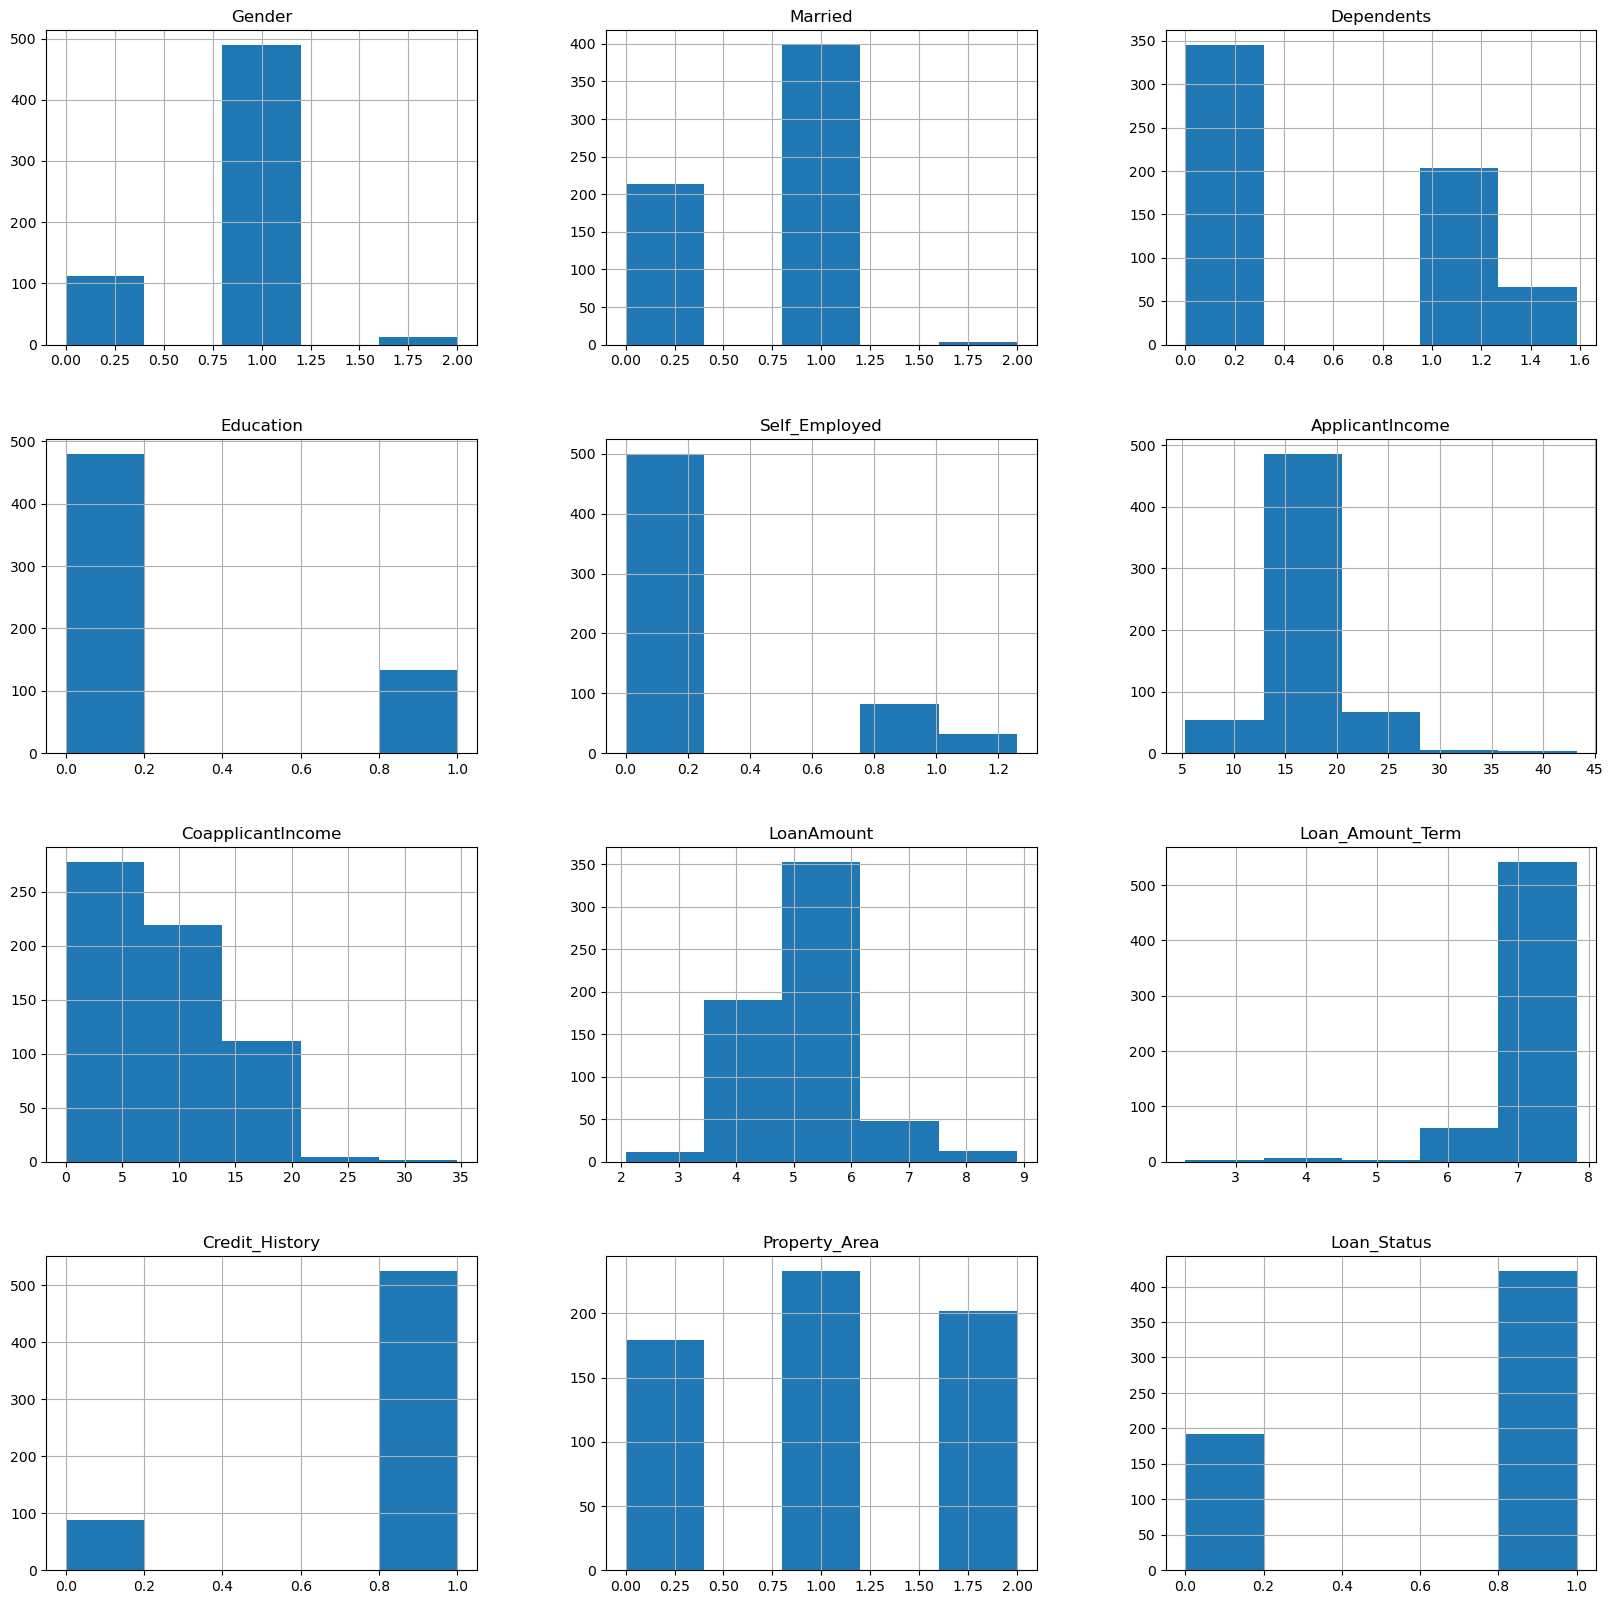

In [65]:
df.hist(bins=5, figsize=(20, 20))
plt.show()

# Feature Selection

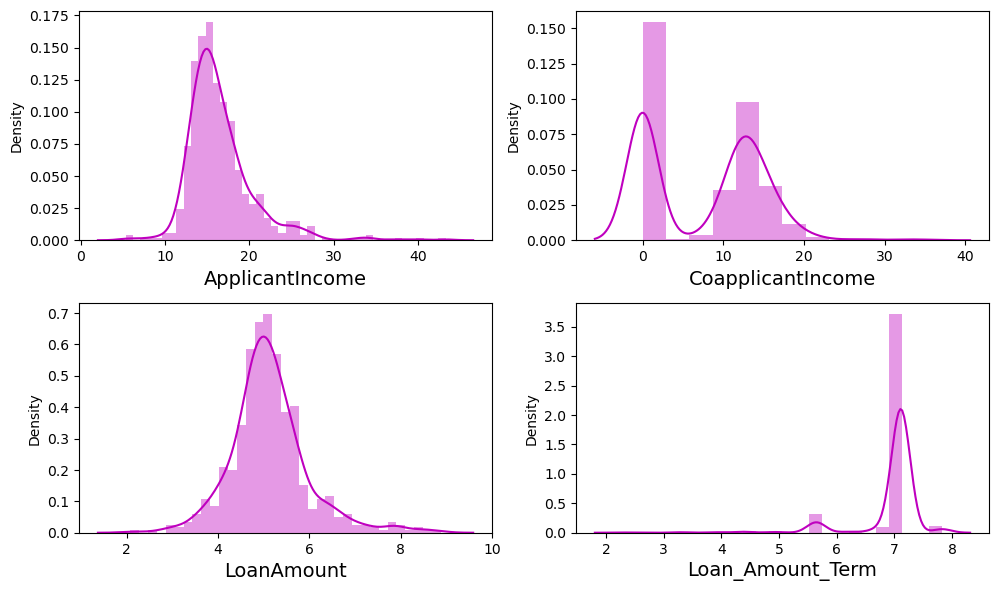

In [66]:
#checking how data is distributed
plt.figure(figsize=(10,6), facecolor ="white")
plotnumber =1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color= "m")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation =0,fontsize = 10 )
    plotnumber+=1
plt.tight_layout()

we observe that all features data is normally distributed

# Separating feature and target

In [67]:
x=df.drop("Loan_Status", axis= 1)
y=df["Loan_Status"]

# Feature Scaling using Standard Scalarization

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.382616,-1.357847,-0.864524,-0.528362,-0.474057,0.380325,-1.053225,0.169528,0.281947,0.426468,1.223298
1,0.382616,0.705812,0.760671,-0.528362,-0.474057,0.022870,0.561256,-0.100752,0.281947,0.426468,-1.318513
2,0.382616,0.705812,-0.864524,-0.528362,1.905579,-0.533028,-1.053225,-1.269462,0.281947,0.426468,1.223298
3,0.382616,0.705812,-0.864524,1.892641,-0.474057,-0.711341,0.820678,-0.226303,0.281947,0.426468,1.223298
4,0.382616,-1.357847,-0.864524,-0.528362,-0.474057,0.419383,-1.053225,0.092554,0.281947,0.426468,1.223298
...,...,...,...,...,...,...,...,...,...,...,...
609,-1.990376,-1.357847,-0.864524,-0.528362,-0.474057,-0.574203,-1.053225,-1.152903,0.281947,0.426468,-1.318513
610,0.382616,0.705812,1.479413,-0.528362,-0.474057,-0.128936,-1.053225,-1.996700,-2.235999,0.426468,-1.318513
611,0.382616,0.705812,0.760671,-0.528362,-0.474057,0.899211,-0.178302,1.403404,0.281947,0.426468,1.223298
612,0.382616,0.705812,1.183094,-0.528362,-0.474057,0.794146,-1.053225,0.693799,0.281947,0.426468,1.223298


we scale the data to overcome biasness

# checking variance inflation Factor(vif)

In [69]:
#find vif in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"] =[variance_inflation_factor(x.values, i)
                    for i in range (len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.169573,Gender
1,1.373110,Married
2,1.209364,Dependents
3,1.067397,Education
4,1.028521,Self_Employed
5,2.021788,ApplicantIncome
6,1.513652,CoapplicantIncome
7,1.840358,LoanAmount
8,1.040104,Loan_Amount_Term
9,1.014034,Credit_History


we observe by checking vif values the feature not causing multicollineraity problem. in no any one have vif is not
more than 10 so no need to drop any feature.
and there no multicollineraity problem .

In [70]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

oversampling

In [71]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [72]:
y1.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

we observe that all features are balanced

# Model Creation

Finding the best random state

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [74]:
maxAccu = 0
maxRS = 0
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = 200)
RFR = RandomForestClassifier()
RFR.fit(x_train, y_train)
pred = RFR.predict(x_test)
acc = accuracy_score(y_test, pred)
if acc>maxAccu:
        maxAccu = acc
        maxRS  = 200
print("Best accuracy is =",  maxAccu, "at random_state ", maxRS) 

Best accuracy is = 0.7834645669291339 at random_state  200


we observe the best accuracy is 82.4% at random_state 200

# creat train test split

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = 200)

# classification algorithms

In [76]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

# RandomForestClassifier

In [77]:
# checking accuracy for RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC= RFC.predict(x_test)
print(accuracy_score(y_test, predRFC)) 
print(confusion_matrix(y_test, predRFC)) 
print(classification_report(y_test, predRFC))

0.7874015748031497
[[ 87  35]
 [ 19 113]]
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       122
           1       0.76      0.86      0.81       132

    accuracy                           0.79       254
   macro avg       0.79      0.78      0.79       254
weighted avg       0.79      0.79      0.79       254



we observe that RandomForestClassifier accuracy 82.28%

# LogisticRegression

In [78]:
# checking accuracy for LogisticRegression
LR = RandomForestClassifier()
LR.fit(x_train, y_train)
predLR= LR.predict(x_test)
print(accuracy_score(y_test, predLR)) 
print(confusion_matrix(y_test, predLR)) 
print(classification_report(y_test, predLR))

0.7913385826771654
[[ 87  35]
 [ 18 114]]
              precision    recall  f1-score   support

           0       0.83      0.71      0.77       122
           1       0.77      0.86      0.81       132

    accuracy                           0.79       254
   macro avg       0.80      0.79      0.79       254
weighted avg       0.80      0.79      0.79       254



we observe that LogisticRegression acuracy 81.88%

# support vector classifier

In [79]:
# checking accuracy for support vector classifier
svc = SVC()
svc.fit(x_train, y_train)
predsvc= svc.predict(x_test)
print(accuracy_score(y_test, predsvc)) 
print(confusion_matrix(y_test, predsvc)) 
print(classification_report(y_test, predsvc))

0.7283464566929134
[[ 69  53]
 [ 16 116]]
              precision    recall  f1-score   support

           0       0.81      0.57      0.67       122
           1       0.69      0.88      0.77       132

    accuracy                           0.73       254
   macro avg       0.75      0.72      0.72       254
weighted avg       0.75      0.73      0.72       254



we observe that support vector classifier accuracy is 72.04%

# GradientBoostingClassifier

In [80]:
# checking accuracy for GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB= GB.predict(x_test)
print(accuracy_score(y_test, predGB)) 
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.8070866141732284
[[ 80  42]
 [  7 125]]
              precision    recall  f1-score   support

           0       0.92      0.66      0.77       122
           1       0.75      0.95      0.84       132

    accuracy                           0.81       254
   macro avg       0.83      0.80      0.80       254
weighted avg       0.83      0.81      0.80       254



we observe that GradientBoostingClassifier accuracy 78.34%

# ExtraTreeClassifier

In [81]:
# checking accuracy for ExtraTreeClassifier
ET = ExtraTreeClassifier()
ET.fit(x_train, y_train)
predET= ET.predict(x_test)
print(accuracy_score(y_test, predET)) 
print(confusion_matrix(y_test, predET)) 
print(classification_report(y_test, predET))

0.7007874015748031
[[85 37]
 [39 93]]
              precision    recall  f1-score   support

           0       0.69      0.70      0.69       122
           1       0.72      0.70      0.71       132

    accuracy                           0.70       254
   macro avg       0.70      0.70      0.70       254
weighted avg       0.70      0.70      0.70       254



we observe that ExtraTreeClassifier accuracy 72.83%

# Cross Validation Score

In [82]:
from sklearn.model_selection import cross_val_score

cv=5--- it's a fold value 1,2,3,4,5
cross_val_score(modelname, features, targetvariable, cv=foldvalue, scoring='accuracy')


in classification algorithms- default scoring parameter- accuracy
for regression- deafult scoring parameter is - r2 score

In [84]:
# checking cv score for Random Forest Classifier
score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_test, predRFC) - score.mean())

[0.80487805 0.74796748 0.7804878  0.82113821 0.80327869]
0.7915500466480074
Difference between Accuracy score and cross validation score is - -0.004148471844857782


In [85]:
# checking cv score for LogisticRegression
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_test, predLR) - score.mean())

[0.82113821 0.75609756 0.77235772 0.81300813 0.79508197]
0.7915367186458749
Difference between Accuracy score and cross validation score is - -0.0001981359687095452


In [86]:
# checking cv score for support vector classifier
score = cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_test, predsvc) - score.mean())

[0.81300813 0.7804878  0.7804878  0.84552846 0.81147541]
0.8061975209916034
Difference between Accuracy score and cross validation score is - -0.07785106429868993


In [87]:
# checking cv score for GradientBoostingClassifier
score = cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_test, predGB) - score.mean())

[0.78861789 0.73170732 0.78861789 0.82926829 0.79508197]
0.786658669865387
Difference between Accuracy score and cross validation score is - 0.02042794430784134


In [88]:
# checking cv score for ExtraTreeClassifier
score = cross_val_score(ET,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_test, predET) - score.mean())

[0.65853659 0.66666667 0.71544715 0.69918699 0.70491803]
0.6889510862321738
Difference between Accuracy score and cross validation score is - 0.0118363153426293


Support Vector Classifier is our best model as the difference between accuracy score and cross validation score
is =-0.08409906378655885 and this is least out of all

finaly we observe that Support Vector Classifier is our best model

# Hyper Parameter Tuning

In [89]:
# Support Vector Classifier
from sklearn.model_selection import GridSearchCV

parameters={'kernel':['linear','rbf'],'C':[1,10],'degree':[3,5],'cache_size':[200,400],'max_iter':[-1,-2]}

In [90]:
GCV=GridSearchCV(SVC(),parameters, cv =5)

In [91]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10], 'cache_size': [200, 400],
                         'degree': [3, 5], 'kernel': ['linear', 'rbf'],
                         'max_iter': [-1, -2]})

In [92]:
GCV.best_params_

{'C': 10, 'cache_size': 200, 'degree': 3, 'kernel': 'rbf', 'max_iter': -1}

In [93]:
Final_model = SVC(C =  10, cache_size = 200, degree = 3, kernel = 'rbf', max_iter = -1)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

75.19685039370079


# Plotting ROC compare auc for all the models used

In [94]:
#Plotting ROC compare auc for all the models used here
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

Plotting ROC compare auc for best model

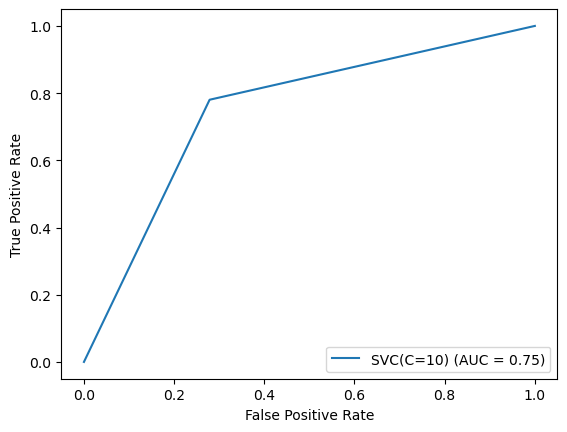

In [95]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=Final_model)
display.plot()

# Saving the model

In [96]:
#saving the model using .pkl
import joblib
joblib.dump(Final_model,"Second_Phase_Evaluation_Project_3_Loan_Application_Status_Prediction_Project_Analysis.pkl")

['Second_Phase_Evaluation_Project_3_Loan_Application_Status_Prediction_Project_Analysis.pkl']

# predicting the saved model

In [97]:
# first we load the saved model and get prediction
model = joblib.load("Second_Phase_Evaluation_Project_3_Loan_Application_Status_Prediction_Project_Analysis.pkl")

#prediction
prediction = model.predict(x_test)
prediction

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0])

# These Are the Prediction for Attrition 

In [98]:
a = np.array(y_test)
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

,Predicted,Original
0,0,0
1,1,0
2,1,1
3,0,1
4,0,1
...,...,...
249,0,0
250,1,1
251,1,1
252,1,1


our findings

Support Vector Classifier is our best model as the difference between accuracy score and cross validation score
is =-0.08409906378655885 and this is least out of all

finaly we observe that Support Vector Classifier is our best model

we also observe that after visualization of features and doing other EDA we find in loan status education, property area, gender,ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History features are directly related . 
                  